In [2]:
!pip install gym[all]
import gym
#import universe
import numpy as np
import time

    100% |████████████████████████████████| 1.5MB 9.9MB/s 
    100% |████████████████████████████████| 1.0MB 10.9MB/s 
    100% |████████████████████████████████| 1.7MB 12.1MB/s 
    100% |████████████████████████████████| 1.2MB 16.2MB/s 
    100% |████████████████████████████████| 2.1MB 14.4MB/s 
    100% |████████████████████████████████| 122kB 30.6MB/s 
    100% |████████████████████████████████| 3.3MB 10.5MB/s 
    100% |████████████████████████████████| 3.4MB 11.3MB/s 
    100% |████████████████████████████████| 430kB 24.6MB/s 
    100% |████████████████████████████████| 163kB 27.5MB/s 
  Running setup.py bdist_wheel for gym ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/ea/ec/dd/33bcc8801d345f0b640fced8a0864a7c8474828564bc5ccf70
  Running setup.py bdist_wheel for PyOpenGL ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/6c/00/7f/1dd736f380848720ad79a1a1de527

In [3]:
env = gym.make('FrozenLake-v0')
s = env.reset()
print('Initial state : ',s)
print()
env.render()


Initial state :  0


SFFF
FHFH
FFFH
HFFG


In [0]:
def epsilon_greedy(Q, s, na, epsilon = 0.3):
  p = np.random.uniform(low=0, high=1)
  if p > epsilon:
    return np.argmax(Q[s])
  else:
    return env.action_space.sample()


In [0]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [0]:
lr = 0.5
y = 0.9
eps = 100000

In [9]:
for i in range(eps):
  s = env.reset()
  t = False
  while(True):
    a = epsilon_greedy(Q, s, env.action_space.n)
    s_, r, t, _ = env.step(a)
    if r==0:
      if t==True:
        r=-5
      else:
        r=0
      #Q[s_] = np.ones(env.action_space.n)*r
    if r==1:
      r=100
      #Q[s_] = np.ones(env.action_space.n)*r
    Q[s,a]= r +lr*(r + y*(np.max(Q[s_]) - Q[s,a]))
    s=s_
    if t==True:
      break
print('Q-table')
print(Q)
        

Q-table
[[ 0.00000000e+00 -4.26063130e-01  4.77005383e-02  0.00000000e+00]
 [-5.64375000e+00 -5.62222329e-01 -3.42636975e+00 -1.94310372e-01]
 [-3.40569375e-01 -2.53252141e+00 -2.24178955e+00  1.07582120e-01]
 [-1.54930735e+00 -7.50735383e+00 -7.50000000e+00  0.00000000e+00]
 [ 6.17566050e-02 -5.95072200e+00 -1.82770929e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.36621476e+00 -7.52769693e+00 -9.19433281e+00 -5.25416584e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.05891258e+00 -3.59650536e+00  4.80787597e+00  0.00000000e+00]
 [-7.84113212e+00 -1.51529507e+01 -8.19640974e+00 -5.69982077e+00]
 [-7.45834251e-01 -1.92967221e+01 -5.76487498e+00 -7.32524665e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.46451453e+01 -2.23028178e+01  1.54234627e-02]
 [ 6.45907111e-01  0.00000000e+00 -4.66239006e+00 -7.4

In [10]:
s = env.reset()
env.render()
R=0
while True:
  a = np.argmax(Q[s])
  print('taking action : ', a, ' [',Q[s,a],']')
  s_, r, t, _ = env.step(a)
  print('going from : ', s, ' --> ',s_)
  print('=============')
  env.render()
  s = s_
  R +=r
  if t==True:
    break

print('final reward : ',R)


SFFF
FHFH
FFFH
HFFG
taking action :  2  [ 0.047700538324024655 ]
going from :  0  -->  4
  (Right)
SFFF
FHFH
FFFH
HFFG
taking action :  0  [ 0.06175660500987444 ]
going from :  4  -->  8
  (Left)
SFFF
FHFH
FFFH
HFFG
taking action :  2  [ 4.807875966275068 ]
going from :  8  -->  9
  (Right)
SFFF
FHFH
FFFH
HFFG
taking action :  3  [ -5.699820771935803 ]
going from :  9  -->  8
  (Up)
SFFF
FHFH
FFFH
HFFG
taking action :  2  [ 4.807875966275068 ]
going from :  8  -->  9
  (Right)
SFFF
FHFH
FFFH
HFFG
taking action :  3  [ -5.699820771935803 ]
going from :  9  -->  8
  (Up)
SFFF
FHFH
FFFH
HFFG
taking action :  2  [ 4.807875966275068 ]
going from :  8  -->  12
  (Right)
SFFF
FHFH
FFFH
HFFG
final reward :  0.0


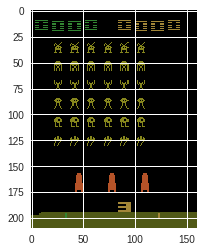

In [23]:

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
import matplotlib.pyplot as plt
%matplotlib inline
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1


env2 = gym.make("SpaceInvaders-v0")
env2.reset()
plt.imshow(env2.render('rgb_array'))

In [1]:
from gym.utils import seeding
#env = gym.make('flashgames.DuskDrive-v0')
#env.configure(remotes=1)  # automatically creates a local docker container
#observation_n = env.reset()

#while True:
#  action_n = [[('KeyEvent', 'ArrowUp', True)] for ob in observation_n]  # your agent here
#  observation_n, reward_n, done_n, info = env.step(action_n)
#  env.render()

ModuleNotFoundError: ignored

In [96]:
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libjpeg-dev is already the newest version (8c-2ubuntu8).
python-dev is already the newest version (2.7.15~rc1-1).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
python-opengl is already the newest version (3.1.0+dfsg-1).
swig is already the newest version (3.0.12-1).
xvfb is already the newest version (2:1.19.6-1ubuntu4).
xorg-dev is already the newest version (1:7.7+19ubuntu7.1).
libsdl2-dev is already the newest version (2.0.8+dfsg1-1ubuntu1.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [97]:
!pip install pyvirtualdisplay
!pip install piglet

In [98]:
!apt-get install cmake zlib1g-dev libjpeg-dev xvfb ffmpeg xorg-dev libboost-all-dev libsdl2-dev swig
!apt-get install python3-dev python3-future
!pip3 install numpy
!pip3 install PyOpenGL
!pip3 install piglet
!pip3 install pyglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libjpeg-dev is already the newest version (8c-2ubuntu8).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
swig is already the newest version (3.0.12-1).
xvfb is already the newest version (2:1.19.6-1ubuntu4).
xorg-dev is already the newest version (1:7.7+19ubuntu7.1).
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
libsdl2-dev is already the newest version (2.0.8+dfsg1-1ubuntu1.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-future is already the newest version (0.15.2-4ubuntu2).
python3-dev is already the newest version (3.6.5-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [99]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [101]:
!apt-get install -y cmake
!apt-get install -y python-numpy python-dev zlib1g-dev libjpeg-dev xvfb libav-tools xorg-dev python-opengl libboost-all-dev libsdl2-dev swig
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Package 'libav-tools' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [18]:
!apt-get install golang libjpeg-turbo8-dev make
!pip3 install universe

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libjpeg-turbo8-dev is already the newest version (1.5.2-0ubuntu5.18.04.1).
libjpeg-turbo8-dev set to manually installed.
The following additional packages will be installed:
  golang-1.10 golang-1.10-doc golang-1.10-go golang-1.10-race-detector-runtime
  golang-1.10-src golang-doc golang-go golang-race-detector-runtime golang-src
Suggested packages:
  bzr mercurial subversion
The following NEW packages will be installed:
  golang golang-1.10 golang-1.10-doc golang-1.10-go
  golang-1.10-race-detector-runtime golang-1.10-src golang-doc golang-go
  golang-race-detector-runtime golang-src
0 upgraded, 10 newly installed, 0 to remove and 4 not upgraded.
Need to get 41.7 MB of archives.
After this operation, 219 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 golan